# Test de Uniformidad y Aleatoriedad
### Pruebas de Kolmogorov-Smirnov

In [1]:
!pip install numpy

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random

def get_random_numbers(size):
    """
    """
    result = np.zeros(size)
    for i in range(size):
        result[i] = random.random()
    return result
    

def get_numpy_random_numbers(size):
    """
    """
    return np.random.uniform(0, 1, size)

In [2]:
size = 500
own_random_values = get_random_numbers(size)
numpy_random_values = get_numpy_random_numbers(size)
uniform_values = [1.0] * size

x_own_random = np.sort(own_random_values)
x_numpy_random = np.sort(numpy_random_values)
x_uniform = np.arange(1 / size, 1 + 1 / size, 1 / size)

y_own_random = np.cumsum(x_own_random / np.max(np.cumsum(x_own_random)))
y_numpy_random = np.cumsum(x_numpy_random / np.max(np.cumsum(x_numpy_random)))
y_uniform = np.cumsum(uniform_values / np.max(np.cumsum(uniform_values)))

In [3]:
De_own_random = np.max(np.absolute(y_own_random - y_uniform))
De_numpy_random = np.max(np.absolute(y_numpy_random - y_uniform))

print(De_own_random)
print(De_numpy_random)

0.25432639083328024
0.25408735286726725


### Prueba $\chi^2$

In [4]:
def chi_square(random_values, classes):
    """
    """
    frequency_values, bins, patches = plt.hist(random_values, classes)
    plt.show()
    expected_observations_per_class = size / classes
    
    summation = 0
    for value in frequency_values:
        squared = (value - expected_observations_per_class) ** 2
        divided = squared / expected_observations_per_class
        summation += divided
    return summation

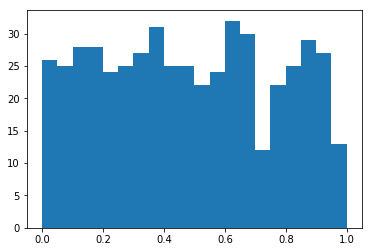

El chi cuadrado del generador propio es: 19.439999999999998


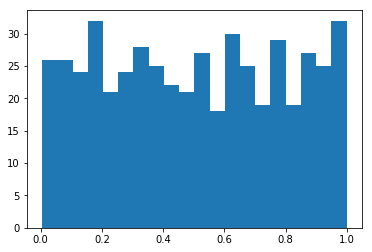

El chi cuadrado del generador numpy es: 12.879999999999999


In [5]:
classes = 20

own_chi_value = chi_square(x_own_random, classes)
print("El chi cuadrado del generador propio es: {}".format(own_chi_value))

numpy_chi_value = chi_square(x_numpy_random, classes)
print("El chi cuadrado del generador numpy es: {}".format(numpy_chi_value))

### Prueba de rachas

In [18]:
def streak_transformer(observations):
    """
    """
    size = len(observations)
    streak_string = ""
    for i in range(size):
        if(i == size - 1):
            break
        if(observations[i] < observations[i + 1]):
            streak_string += "1"
        else:
            streak_string += "0"
    return streak_string

def streak_counter(streak_string):
    """
    """
    size = len(streak_string)
    one_streaks = 0
    zero_streaks = 0
    
    for i in range(size):
        if(i == size - 1):
            break
        if(streak_string[i] == "1" and streak_string[i + 1] == "0"):
            one_streaks += 1
        elif(streak_string[i] == "0" and streak_string[i + 1] == "1"):
            zero_streaks += 1
    
    total_streaks = one_streaks + zero_streaks
    result = (one_streaks, zero_streaks, total_streaks)
    return result

In [23]:
streak_own_string = streak_transformer(own_random_values)
streak_numpy_string = streak_transformer(numpy_random_values)

streak_own_values = streak_counter(streak_own_string)
streak_numpy_values = streak_counter(streak_numpy_string)
print(streak_own_values, streak_numpy_values)

(175, 174, 349) (170, 170, 340)


### Prueba de permutaciones

### Prueba de huecos